In [21]:
import importlib
from Utils import Preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
importlib.reload(Preprocessing)

<module 'Utils.Preprocessing' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Utils/Preprocessing.py'>

In [3]:
dict_train_count, dict_test_count, class_weights = Preprocessing.class_occurences()

In [4]:
dict_train_count

{'ModerateDemented': 52,
 'VeryMildDemented': 1792,
 'MildDemented': 717,
 'NonDemented': 2560,
 'Total': 5121}

In [5]:
dict_test_count

{'ModerateDemented': 12,
 'VeryMildDemented': 448,
 'MildDemented': 179,
 'NonDemented': 640,
 'Total': 1279}

In [6]:
class_weights

{'ModerateDemented': 1.0,
 'VeryMildDemented': 0.008885850991114148,
 'MildDemented': 0.05329445078399054,
 'NonDemented': 0.0}

In [7]:
X_train, y_train, labels_list_train = Preprocessing.to_numpy_arrays(class_weights=class_weights, get_train=True)

In [8]:
X_train.max()

1.0

In [9]:
X_train.min()

0.0

In [8]:
X_train.shape

(5121, 208, 176)

In [9]:
img_height=208
img_width=176

In [10]:
X_train_pca_one_shot = X_train.reshape(X_train.shape[0], img_height*img_width)
X_train_pca_one_shot.shape

(5121, 36608)

In [11]:
pca = PCA(n_components=0.95)
pca.fit(X_train_pca_one_shot)
n_features = pca.n_components_
n_features

693

In [12]:
X_train_pca_one_shot = pca.transform(X_train_pca_one_shot)
X_train_pca_one_shot.shape

(5121, 693)

In [14]:
np.save('PCA_Data/X_train_pca_one_shot.npy', X_train_pca_one_shot)

In [15]:
# save the model to disk
import pickle
filename = 'PCA_Data/pca_one_shot_model.pkl'
pickle.dump(pca, open(filename, 'wb'))

In [16]:
# free memory
del X_train
del y_train
del labels_list_train
del X_train_pca_one_shot

In [17]:
X_test, y_test, labels_list_test = Preprocessing.to_numpy_arrays(class_weights=class_weights, get_train=False)

In [18]:
X_test_pca_one_shot = X_test.reshape(X_test.shape[0], img_height*img_width)
X_test_pca_one_shot.shape

(1279, 36608)

In [22]:
X_test_pca_one_shot = pca.transform(X_test_pca_one_shot)
X_test_pca_one_shot.shape

(1279, 693)

In [23]:
np.save('PCA_Data/X_test_pca_one_shot.npy', X_train_pca_one_shot)

In [26]:
def display(array1, array2, labels):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(208, 176))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(208, 176))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title(labels[i], fontsize=10)

    plt.show()

In [24]:
X_test_pca_one_shot_reconstructed = pca.inverse_transform(X_test_pca_one_shot)
X_test_pca_one_shot_reconstructed.shape

(1279, 36608)

In [25]:
X_test_pca_one_shot_reconstructed = X_test_pca_one_shot_reconstructed.reshape(X_test_pca_one_shot_reconstructed.shape[0], img_height, img_width)
X_test_pca_one_shot_reconstructed.shape

(1279, 208, 176)

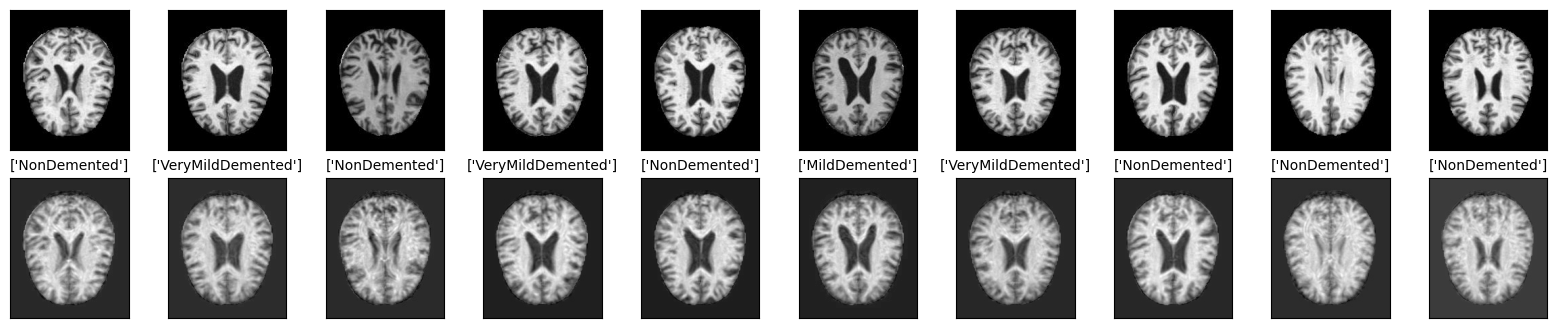

In [27]:
display(X_test, X_test_pca_one_shot_reconstructed, labels_list_test)

In [9]:
X_train = X_train.reshape(-1,img_width)

In [10]:
X_train.shape

(1065168, 176)

In [11]:
# see how many features are needed to explain 95% of the variance
pca = PCA(n_components=0.99)
pca.fit(X_train)
new_width = pca.n_components_
new_width

41

In [12]:
# use PCA to reduce the dimensionality of the data
pca_width = PCA(n_components=new_width)

pca_width.fit(X_train)

X_train_pca_w = pca.transform(X_train)

X_train_pca_w.shape

(1065168, 41)

In [13]:
# normalize with min-max normalization by column
X_train_pca_w = (X_train_pca_w - X_train_pca_w.min(axis=0))/(X_train_pca_w.max(axis=0) - X_train_pca_w.min(axis=0))

In [14]:
X_train_pca_w.T.shape

(41, 1065168)

In [15]:
X_train_pca_w.T.reshape(-1,img_height).shape

(209961, 208)

In [16]:
X_train_pca_w = X_train_pca_w.T.reshape(-1,img_height)

In [17]:
X_train_pca_w.shape

(209961, 208)

In [18]:
pca = PCA(n_components=0.99)
pca.fit(X_train_pca_w)
new_hight = pca.n_components_
new_hight

87

In [19]:
# use PCA to reduce the dimensionality of the data
pca_height = PCA(n_components=new_hight)

# fit PCA on training set
pca_height.fit(X_train_pca_w)

# transform training set
X_train_pca_wh = pca.transform(X_train_pca_w)

X_train_pca_wh.shape

(209961, 87)

In [20]:
# normalize with min-max normalization by column
X_train_pca_wh = (X_train_pca_wh - X_train_pca_wh.min(axis=0))/(X_train_pca_wh.max(axis=0) - X_train_pca_wh.min(axis=0))

In [21]:
X_train_pca_wh.reshape(-1,new_width,new_hight).shape

(5121, 41, 87)

In [22]:
X_train_pca_wh = X_train_pca_wh.reshape(-1,new_width,new_hight)

In [23]:
X_train_pca_wh.max()

1.0

In [24]:
X_train_pca_wh.min()

0.0

In [26]:
# save the data
np.save('X_train_pca_wh.npy', X_train_pca_wh)
np.save('y_train.npy', y_train)
np.save('labels_list_train.npy', labels_list_train)

In [30]:
# free memory
del dict_train_count
del dict_test_count

del X_train
del y_train
del labels_list_train
del X_train_pca_w
del X_train_pca_wh

NameError: name 'X_train' is not defined

In [31]:
X_test, y_test, labels_list_test = Preprocessing.to_numpy_arrays(class_weights=class_weights, get_train=False)

In [32]:
# do the same for the test set
X_test = X_test.reshape(-1,img_width)

print(X_test.shape)

X_test_pca_w = pca_width.transform(X_test)

print(X_test_pca_w.shape)

X_test_pca_w = (X_test_pca_w - X_test_pca_w.min(axis=0))/(X_test_pca_w.max(axis=0) - X_test_pca_w.min(axis=0))

(266032, 176)
(266032, 41)


In [33]:
X_test_pca_w = X_test_pca_w.T.reshape(-1,img_height)

print(X_test_pca_w.shape)

X_test_pca_wh = pca_height.transform(X_test_pca_w)

X_test_pca_wh = (X_test_pca_wh - X_test_pca_wh.min(axis=0))/(X_test_pca_wh.max(axis=0) - X_test_pca_wh.min(axis=0))

print(X_test_pca_wh.shape)

X_test_pca_wh = X_test_pca_wh.reshape(-1,new_width,new_hight)

print(X_test_pca_wh.shape)

(52439, 208)
(52439, 87)
(1279, 41, 87)


In [ ]:
# save the data
np.save('X_test_pca_wh.npy', X_test_pca_wh)
np.save('y_test.npy', y_test)
np.save('labels_list_test.npy', labels_list_test)